<a href="https://colab.research.google.com/github/friozi/10DTS/blob/main/Demo8_Kmeans_Crime_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 4 - Machine Learning

# Demo 8 - Demonstração - Aprendizagem Não Supervisionada - K-Means

### Prof Dr. Ahirton Lopes (profahirton.lopes@fiap.com.br)

### Utilização de K-Means para agrupamento de dados de crimes na cidade de Toronto, visando mostrar os pontos centrais de ocorrências do crime do tip b&e (Agrupamento - Aprendizagem Não Supervisionada).

#### Criaremos um mapa de crime do tipo "Break and Enter", classificado na base como um dos Principais Indicadores de Crime (MCI), especificamente em apartamentos no centro de Toronto.  Usando uma técnica de agrupamento com K-Means, o foco principal desta demo exibir os centróides dos clusters, ao invés de examinar os próprios clusters.



In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [5]:
# Upload de nosso arquivo. Ref. - https://data.torontopolice.on.ca/search?tags=MCI

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving MCI_2014_to_2017.csv to MCI_2014_to_2017.csv
User uploaded file "MCI_2014_to_2017.csv" with length 34145138 bytes


In [6]:
crime_data = pd.read_csv('MCI_2014_to_2017.csv', delimiter=",", header=0)

### Data Wrangling

In [7]:
crime_data.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,FID
0,-79.520401,43.768829,14601,GO-20142775022,2014-08-25T04:00:00.000Z,2014-08-25T04:00:00.000Z,Outside,1430,100,Assault,...,237.0,Monday,18,Assault,D31,24,Black Creek (24),43.768829,-79.520401,14001
1,-79.580856,43.642574,14602,GO-20142870874,2014-08-25T04:00:00.000Z,2014-09-08T04:00:00.000Z,House,2120,220,B&E W'Intent,...,237.0,Monday,9,Break and Enter,D22,11,Eringate-Centennial-West Deane (11),43.642574,-79.580856,14002
2,-79.260445,43.762909,14603,GO-20142802386,2014-08-25T04:00:00.000Z,2014-08-29T04:00:00.000Z,House,1430,100,Assault,...,237.0,Monday,11,Assault,D41,127,Bendale (127),43.762909,-79.260445,14003
3,-79.367546,43.663208,14604,GO-20142777955,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,Commercial,2120,200,B&E,...,237.0,Monday,17,Break and Enter,D51,71,Cabbagetown-South St.James Town (71),43.663208,-79.367546,14004
4,-79.231758,43.776440,14605,GO-20142778699,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,Other,2120,200,B&E,...,237.0,Monday,16,Break and Enter,D43,137,Woburn (137),43.776440,-79.231758,14005


In [8]:
crime_data.dtypes
#temos que tranformar os dados em variavel numerica ou categorica


,0
X,float64
Y,float64
Index_,int64
event_unique_id,object
occurrencedate,object
reporteddate,object
premisetype,object
ucr_code,int64
ucr_ext,int64
offence,object


In [9]:
crime_data[crime_data.X != crime_data.Long].head() # verificar a diferenca entre  X e Long .

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,FID
2,-79.260445,43.762909,14603,GO-20142802386,2014-08-25T04:00:00.000Z,2014-08-29T04:00:00.000Z,House,1430,100,Assault,...,237.0,Monday,11,Assault,D41,127,Bendale (127),43.762909,-79.260445,14003
3,-79.367546,43.663208,14604,GO-20142777955,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,Commercial,2120,200,B&E,...,237.0,Monday,17,Break and Enter,D51,71,Cabbagetown-South St.James Town (71),43.663208,-79.367546,14004
7,-79.382530,43.705540,14608,GO-20142779486,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,House,2120,200,B&E,...,237.0,Monday,21,Break and Enter,D53,99,Mount Pleasant East (99),43.705540,-79.382530,14008
9,-79.344650,43.764641,14610,GO-20142910587,2014-09-14T04:00:00.000Z,2014-09-14T04:00:00.000Z,Apartment,1430,100,Assault,...,257.0,Sunday,20,Assault,D33,45,Parkwoods-Donalda (45),43.764641,-79.344650,14010
15,-79.343803,43.685032,14616,GO-20142906993,2014-09-14T04:00:00.000Z,2014-09-14T04:00:00.000Z,House,2120,200,B&E,...,257.0,Sunday,8,Break and Enter,D54,59,Danforth East York (59),43.685032,-79.343803,14016


In [10]:
print(crime_data.X[2]) # diferenca entre x e long é somente valores zero
print(crime_data.Long[2])

-79.26044460000001
-79.2604446


In [11]:
# remover colunas duplicadas e outra que nao servem para analisar os dados ex: index (codigo do assalto na policia),
crime_data.drop(['X', 'Y', 'Index_', 'event_unique_id','ucr_code','ucr_ext','FID',
                 'Neighbourhood'], axis=1, inplace=True)

In [12]:
occurrencedate_list = crime_data.occurrencedate.str.split('T').tolist()
reporteddate_list = crime_data.reporteddate.str.split('T').tolist()

for i in range(len(occurrencedate_list)):
    occurrencedate_list[i] = occurrencedate_list[i][0]

for i in range(len(reporteddate_list)):
    reporteddate_list[i] = reporteddate_list[i][0]

crime_data['occurrencedate'] = occurrencedate_list
crime_data['reporteddate'] = reporteddate_list

crime_data.occurrencedate = pd.to_datetime(crime_data.occurrencedate)
crime_data.reporteddate = pd.to_datetime(crime_data.reporteddate)

In [13]:
crime_data.drop(['reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear',
                'occurrenceyear', 'occurrencemonth', 'occurrenceday', 'occurrencedayofyear'],
                axis=1, inplace=True)

In [14]:
crime_data.premisetype = crime_data.premisetype.astype('category', errors='raise')
crime_data.offence = crime_data.offence.astype('category', errors='raise')
crime_data.MCI = crime_data.MCI.astype('category', errors='raise')
crime_data.reporteddayofweek = crime_data.reporteddayofweek.astype('category', errors='raise')
# there are whitespaces in the days of week, which should be removed before transformation
crime_data.occurrencedayofweek = crime_data.occurrencedayofweek.str.rstrip().astype('category', errors='raise')
crime_data.Division = crime_data.Division.astype('category', errors='raise')

### K-Means Clustering

In [15]:
def doKMeans(data, n_clusters):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data.Long, data.Lat, marker='.', c='blue', alpha=0.2)

    data = data.loc[:, ['Long', 'Lat']]

    model = KMeans(n_clusters=n_clusters)
    model.fit(data)

    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.8, linewidths=3, s=169)
    plt.show()

In [16]:
break_enter_ap = crime_data[(crime_data.MCI == 'Break and Enter')
                           & (crime_data.premisetype == 'Apartment')]
break_enter_ap.reset_index(inplace=True, drop=True)

Resultado com 3 clusters:

[[-79.33867348  43.68264268]
 [-79.55328499  43.66615674]
 [-79.25677362  43.73116187]
 [-79.43068187  43.77213493]
 [-79.44745207  43.65438227]
 [-79.37436867  43.66200277]
 [-79.34230671  43.77146565]
 [-79.20852882  43.76986599]
 [-79.54023451  43.74768751]
 [-79.50279995  43.61626381]
 [-79.49916362  43.70067768]
 [-79.40419482  43.65257789]
 [-79.300673    43.70194605]
 [-79.28812426  43.78275934]
 [-79.4151941   43.70130935]]


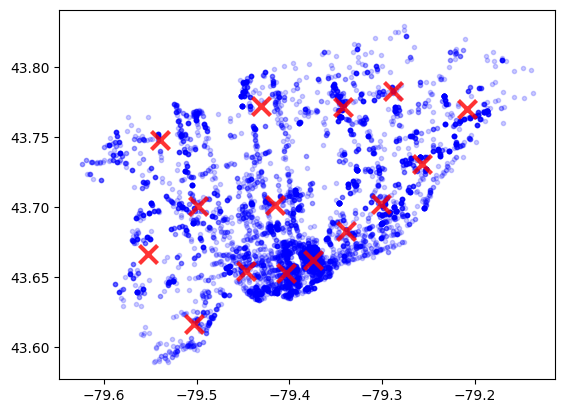

In [20]:
doKMeans(break_enter_ap, 15)

In [21]:
break_enter_ap[(break_enter_ap.Long > -79.4) & (break_enter_ap.Lat < 43.63)]
break_enter_ap.drop(71, axis=0, inplace=True)

KeyError: '[71] not found in axis'

[[-79.37760607  43.66584799]
 [-79.40591601  43.64850894]
 [-79.36964721  43.65343668]]


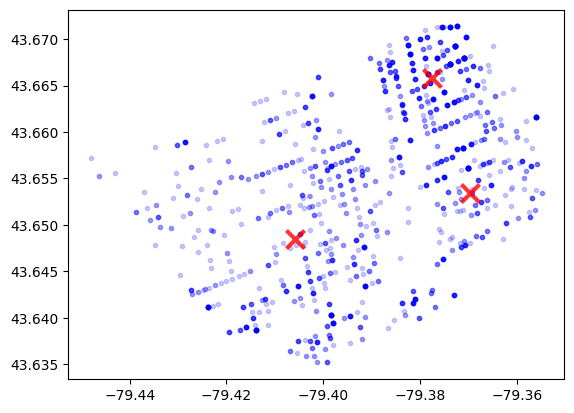

In [19]:
doKMeans(break_enter_ap[(break_enter_ap.Hood_ID > 70) & (break_enter_ap.Hood_ID < 85)], 3)